C:\Users\Hoang Bao Khanh\AppData\Local\Temp\ipykernel_26952\408873255.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  confusion_matrix_display.plot(ax=ax, cmap=plt.cm.get_cmap('YlOrRd'))


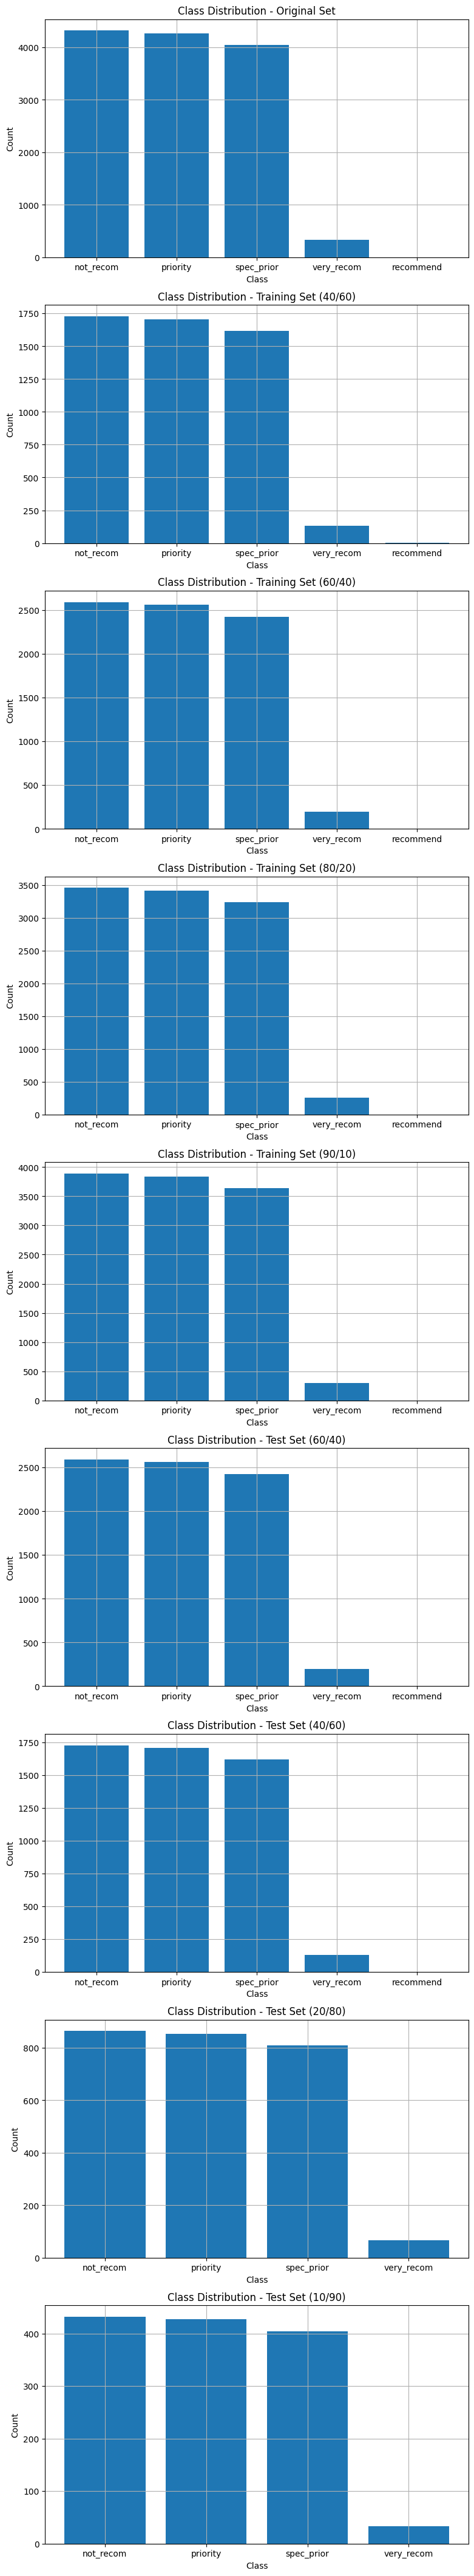

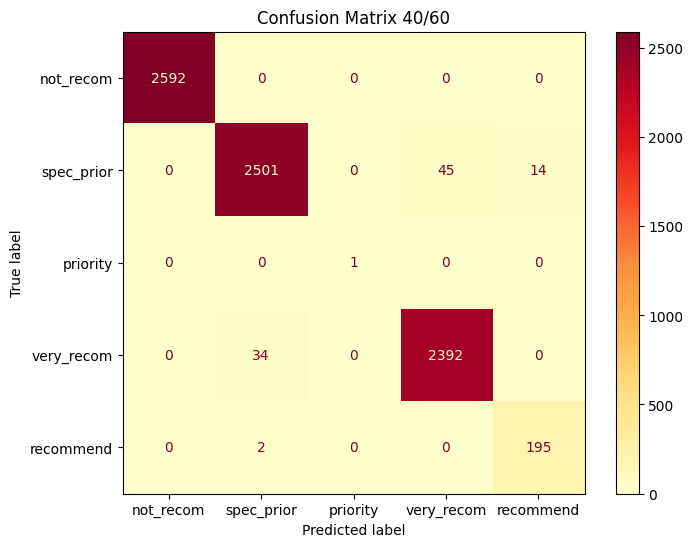

Classification report 40/60: 
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      2592
    priority       0.99      0.98      0.98      2560
   recommend       1.00      1.00      1.00         1
  spec_prior       0.98      0.99      0.98      2426
  very_recom       0.93      0.99      0.96       197

    accuracy                           0.99      7776
   macro avg       0.98      0.99      0.99      7776
weighted avg       0.99      0.99      0.99      7776




C:\Users\Hoang Bao Khanh\AppData\Local\Temp\ipykernel_26952\408873255.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  confusion_matrix_display.plot(ax=ax, cmap=plt.cm.get_cmap('YlOrRd'))


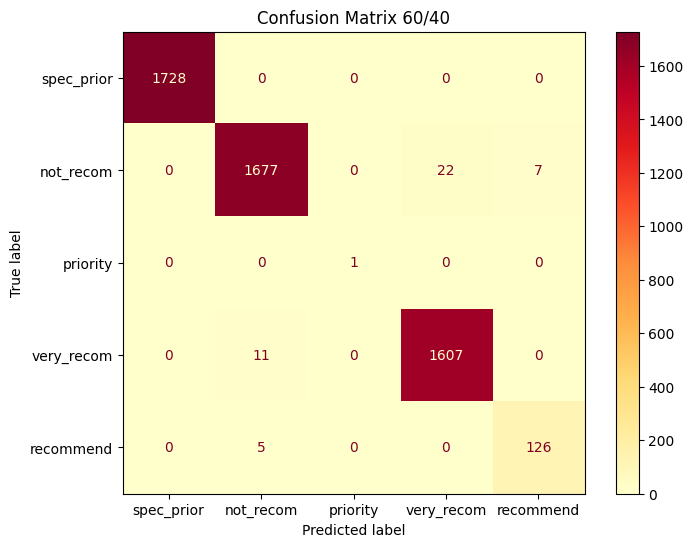

Classification report 60/40: 
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      1728
    priority       0.99      0.98      0.99      1706
   recommend       1.00      1.00      1.00         1
  spec_prior       0.99      0.99      0.99      1618
  very_recom       0.95      0.96      0.95       131

    accuracy                           0.99      5184
   macro avg       0.98      0.99      0.99      5184
weighted avg       0.99      0.99      0.99      5184




C:\Users\Hoang Bao Khanh\AppData\Local\Temp\ipykernel_26952\408873255.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  confusion_matrix_display.plot(ax=ax, cmap=plt.cm.get_cmap('YlOrRd'))


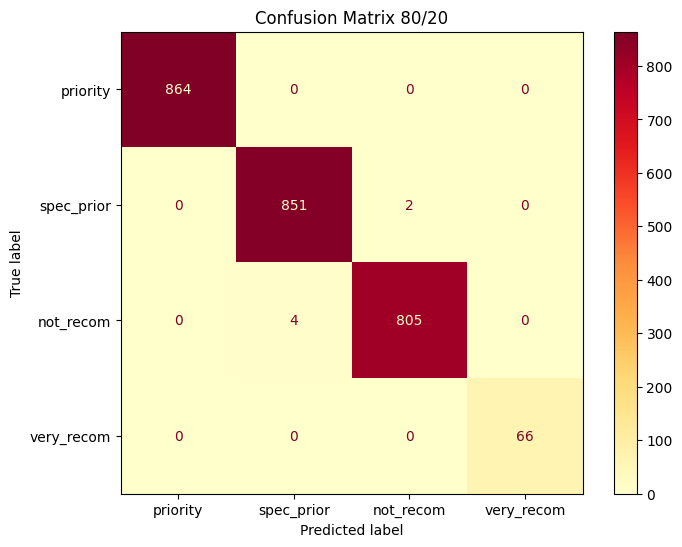

Classification report 80/20: 
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       1.00      1.00      1.00       853
  spec_prior       1.00      1.00      1.00       809
  very_recom       1.00      1.00      1.00        66

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592




C:\Users\Hoang Bao Khanh\AppData\Local\Temp\ipykernel_26952\408873255.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  confusion_matrix_display.plot(ax=ax, cmap=plt.cm.get_cmap('YlOrRd'))


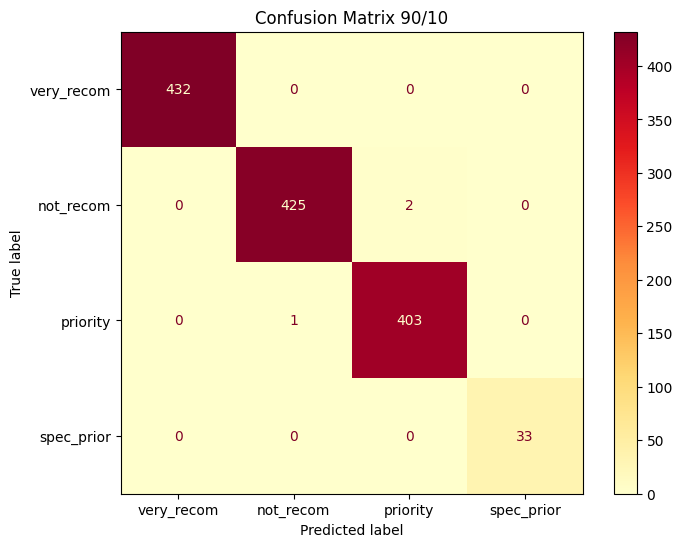

Classification report 90/10: 
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       432
    priority       1.00      1.00      1.00       427
  spec_prior       1.00      1.00      1.00       404
  very_recom       1.00      1.00      1.00        33

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296


------------ACCURACY------------
╒═══════════╤══════╤══════╤══════╤══════╤══════╤═════╤══════╕
│ max_depth │ None │ 2    │ 3    │ 4    │ 5    │ 6   │ 7    │
├───────────┼──────┼──────┼──────┼──────┼──────┼─────┼──────┤
│ Accuracy  │ 1.0  │ 0.77 │ 0.83 │ 0.86 │ 0.88 │ 0.9 │ 0.92 │
╘═══════════╧══════╧══════╧══════╧══════╧══════╧═════╧══════╛


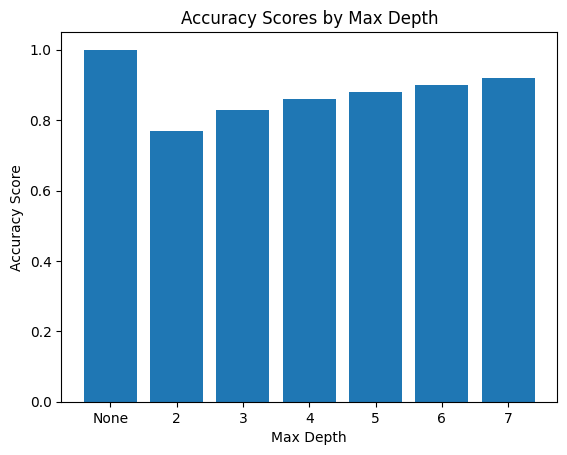

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from io import StringIO
from tabulate import tabulate

# Read file
data = pd.read_csv("nursery/nursery.data.csv", header=None)

# Shuffle data
data_shuffled = data.sample(frac = 1, random_state=None)

#Separate features and labels
X = data.iloc[:, :-1] # All colunms except the last one
y = data.iloc[:, -1] # The last column

X = pd.get_dummies(X)       # Convert series of strings to dummy code

splits_proportions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]

feature_train_sets, feature_test_sets, label_train_sets, label_test_sets = [], [], [], []

def splitData():
    for split in splits_proportions:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split[0], 
                                                            test_size=split[1], random_state=None, stratify=y)

        feature_train_sets.append(X_train)
        feature_test_sets.append(X_test)
        label_train_sets.append(y_train)
        label_test_sets.append(y_test)

# Visualize the distributions of classes
def visualizeClasses():
    all_sets = [(X, y)] + list(zip(feature_train_sets, label_train_sets)) + list(zip(feature_test_sets, label_test_sets))
    set_names = ["Original Set"] + [f"Training Set ({int(train_size * 100)}/{int(test_size * 100)})" for train_size, test_size in splits_proportions] + [f"Test Set ({int(test_size * 100)}/{int(train_size * 100)})" for train_size, test_size in splits_proportions]


    fig, axs = plt.subplots(len(all_sets), figsize=(9, 6 * len(all_sets)))
    for ax, (features_set, labels_set), set_name in zip(axs, all_sets, set_names):
        class_counts = labels_set.value_counts()
        ax.bar(class_counts.index, class_counts.values)
        ax.set_title(f"Class Distribution - {set_name}")
        ax.set_xlabel("Class")
        ax.set_ylabel("Count")
        ax.grid(True)

#plt.show()    

# Buld decision trees and visualize decision trees by graphviz
trees = []
def buildDecisionTrees(feature_train_sets, label_train_sets, splits_proportions):
    for feature_train, label_train, split in zip(feature_train_sets, label_train_sets, splits_proportions):
        clf = DecisionTreeClassifier(criterion="entropy")
        clf.fit(feature_train, label_train)

        dot_data = StringIO()
        export_graphviz(clf, out_file=dot_data, feature_names=X.columns, class_names=y.unique(),
                        filled=True, rounded=True, special_characters=True)
        
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
        file_name = f"Decision_Tree/Decision_tree_{int(split[0] * 100)}_{int(split[1] * 100)}.pdf"
        graph.write_pdf(file_name)
        trees.append(clf)
        
def evaluateDecisionTreeClassifiers():
    for i in range(len(trees)):
        x_test = feature_test_sets[i]
        y_test = label_test_sets[i]
        y_pred = trees[i].predict(x_test)
        matrix = confusion_matrix(y_test, y_pred)
        confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=y_test.unique())
        fig, ax = plt.subplots(figsize=(8, 6))
        plt.title(f"Confusion Matrix {int(splits_proportions[i][0] * 100)}/{int(splits_proportions[i][1] * 100)}")
        confusion_matrix_display.plot(ax=ax, cmap=plt.cm.get_cmap('YlOrRd'))
        
        plt.show()

        report = classification_report(y_test, y_pred)

        print(f"Classification report {int(splits_proportions[i][0] * 100)}/{int(splits_proportions[i][1] * 100)}: ")
        print(report)
        print()

# Depth and accuracy of tree
def accuracy_with_depth():
    print("------------ACCURACY------------")
    max_depth_values = ['None', '2', '3', '4', '5', '6', '7']
    trainSize = 0.8
    testSize = 0.2
    #Train size is 0.8 and test size is 0.2
    accuracy_score_list = []
    feature_train = feature_train_sets[2] 
    feature_test = feature_test_sets[2]
    label_train = label_train_sets[2]
    label_test = label_test_sets[2]

    for max_depth in max_depth_values:
        clf = DecisionTreeClassifier(criterion="entropy", max_depth=int(max_depth) if max_depth != 'None' else None)
        clf.fit(feature_train, label_train)
        prediction = clf.predict(feature_test)
        accuracy = accuracy_score(label_test, prediction)
        accuracy_score_list.append(round(accuracy, 2))
        dot_data = StringIO()
        export_graphviz(clf, out_file=dot_data, feature_names=X.columns, class_names=y.unique(),
                        filled=True, rounded=True, special_characters=True)
        
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
        if max_depth == None:
            file_name = f"Depth/Decision_tree_None_depth.pdf"
        else:
            file_name = f"Depth/Decision_tree_{max_depth}_depth.pdf"

        graph.write_pdf(file_name)
        
    
    # Create table
    df = pd.DataFrame({"max_depth" : max_depth_values, "Accuracy": accuracy_score_list})
    
    # Transpose horizontally
    df_transposed = df.transpose()

    transposed_data = df_transposed.reset_index().values.tolist()
    table = tabulate(transposed_data, tablefmt="fancy_grid")

    print(table)

    # Draw chart
    x_labels = ['None', '2', '3', '4', '5', '6', '7']
    y_values = df_transposed.values[1]
    plt.bar(x_labels, y_values)
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy Scores by Max Depth")
    plt.show()
    
if __name__ == "__main__":
    splitData()
    visualizeClasses()
    buildDecisionTrees(feature_train_sets, label_train_sets, splits_proportions)
    evaluateDecisionTreeClassifiers()
    accuracy_with_depth()